<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_1/chapter1_diffraction_circular_aperture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Photonic devices and systems - Mie scattering from a spherical particle**

---

# Mie scattering: main definitions

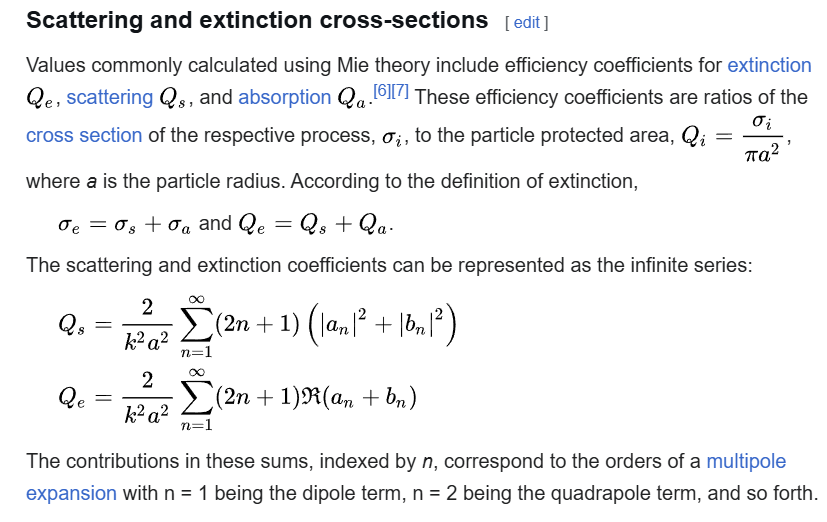

In [3]:
import numpy as np
from scipy.special import jv, yv,jvp,yvp  # Bessel functions of the first and second kind and its derivatives

# Bessel functions j and y
def jn_norm(n, x):
    return np.sqrt(np.pi / (2.0 * x)) * jv(n + 0.5, x)

def yn_norm(n, x):
    return np.sqrt(np.pi / (2.0 * x)) * yv(n + 0.5, x)

# Complex Bessel function h1 and h2
def h1(n, x):
    return jn_norm(n, x) + 1j * yn_norm(n, x)

def h2(n, x):
    return jn_norm(n, x) - 1j * yn_norm(n, x)

# psi and xi functions
def psi(n, x):
    return x * jn_norm(n, x)

def xi(n, x):
    return x * h1(n, x)

# Derivatives of psi and xi using scipy.special for derivatives of Bessel functions
def psidev(n, x):
    dev=np.sqrt(x)*jvp(n + 0.5, x,1)+0.5*jv(n+0.5,x)/np.sqrt(x)
    return np.sqrt(np.pi /2.0) *dev

def xidev(n, x):
    dev=np.sqrt(x)*(jvp(n + 0.5, x,1) + 1j * yvp(n + 0.5, x,1))+\
        0.5*(jv(n+0.5, x) + 1j * yv(n+0.5, x))/np.sqrt(x)
    return np.sqrt(np.pi /2.0) *dev

# a function
def a(n, x, m):
    term1 = m * psi(n, m * x) * psidev(n, x) - psi(n, x) * psidev(n, m * x)
    term2 = m * psi(n, m * x) * xidev(n, x) - xi(n, x) * psidev(n, m * x)
    return term1 / term2

# b function
def b(n, x, m):
    term1 = psi(n, m * x) * psidev(n, x) - m * psi(n, x) * psidev(n, m * x)
    term2 = psi(n, m * x) * xidev(n, x) - m * xi(n, x) * psidev(n, m * x)
    return term1 / term2

# Qsca function
def Qsca_n(n, w, r,eps_w,n_med):
    M=np.sqrt(eps_w) / n_med
    X_wr = (2.0 * np.pi * w * r * n_med) / 1239.8283 # k*r
    return (2.0 / X_wr**2) * (2.0 * n + 1.0) * (np.abs(a(n, X_wr, M))**2 + np.abs(b(n, X_wr, M))**2)

# Qsca function (sum over n)
def Qsca(w, r, J,eps_w,n_med):
    return sum(Qsca_n(n, w, r,eps_w,n_med) for n in range(1, J+1))

# Qext function
def Qext_n(n, w, r,eps_w,n_med):
    M=np.sqrt(eps_w) / n_med
    X_wr = (2.0 * np.pi * w * r * n_med) / 1239.8283 # k*r
    return (2.0 / X_wr**2) * (2.0 * n + 1.0) * np.real(a(n, X_wr, M) + b(n, X_wr, M))

# Qext function (sum over n)
def Qext(w, r, J,eps_w,n_med):
    return sum(Qext_n(n, w, r,eps_w,n_med) for n in range(1, J+1))

# Optical properties of silver

In [4]:
'''
Definition of metal and substrate dielectric constants
'''
def epsilon_ag(omega):
    '''
    Drude-Lorentz dielectric function for Silver
    omega in eV
    '''
    epsilon_r = 4.1
    omega_p = 9.5  # eV
    gamma = 0.025  # eV
    lambda_epsilon = 1.0
    capital_omega = 5.5  # eV
    capital_gamma = 0.8  # eV
    return (epsilon_r - omega_p**2 / (omega * (omega + 1j * gamma)) -
            lambda_epsilon * capital_omega**2 / (omega**2 - capital_omega**2 + 1j * omega * capital_gamma))

# Wavelength range

In [10]:
lambda0=400.0;lambdaf=2000.0;Nlambda=500 # wavelength in nm
wlength=np.linspace(lambda0,lambdaf,Nlambda)
flw = 1239.8283  # Conversion from nm to eV and vice versa
omega=flw/wlength # omega in eV

# Plotting the dielectric constant of silver

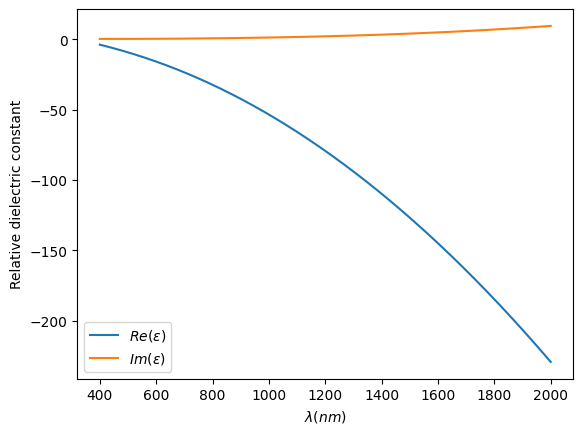

In [11]:
import matplotlib.pyplot as plt
# Values
eps_metal=epsilon_ag(omega)
re_eps=np.real(eps_metal)
im_eps=np.imag(eps_metal)

# Plotting
plt.plot(wlength,re_eps,label=r'$Re(\varepsilon)$')
plt.plot(wlength,im_eps,label=r'$Im(\varepsilon)$')
plt.xlabel(r'$\lambda (nm)$')
plt.ylabel("Relative dielectric constant")
plt.legend()
plt.show()

# Mie scattering coefficients

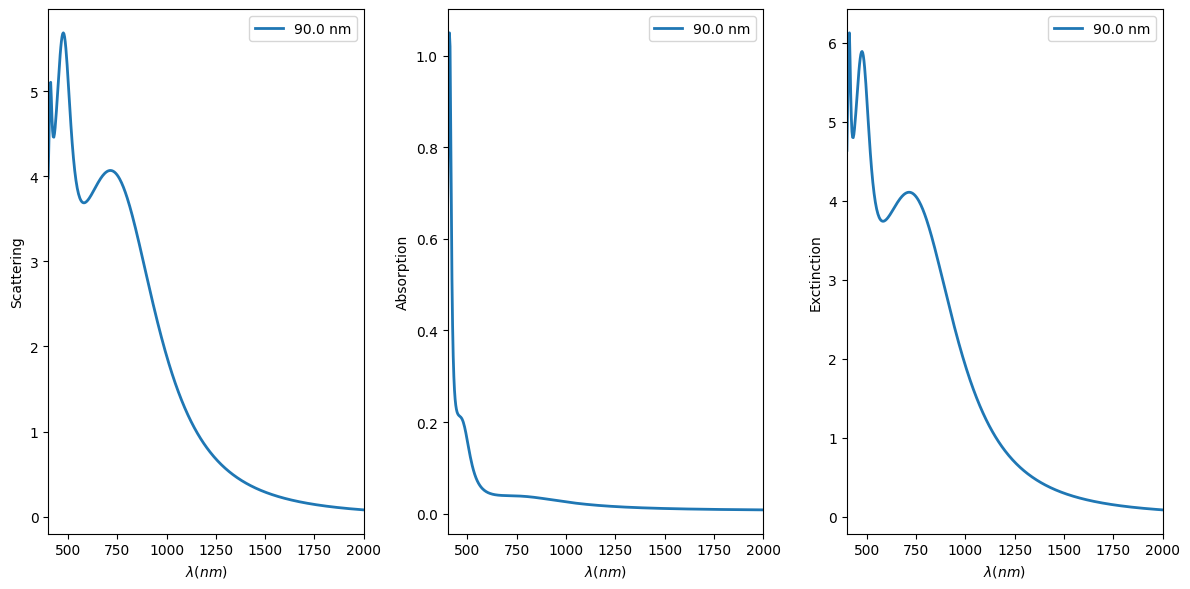

In [16]:
# Surrounding medium
n_med=1.38

# Radious in nm
radius = 90.0
J=10

# Mie scattering calculation
sca,ext,abs=[],[],[]
for i, wl in enumerate(wlength):
    w= flw/wl
    sca.append(Qsca(w, radius, J,eps_metal[i],n_med))
    ext.append(Qext(w, radius, J,eps_metal[i],n_med))
    abs.append(ext[i]-sca[i])

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].plot(wlength, sca, label=f"{r} nm", lw=2)
ax[1].plot(wlength, abs, label=f"{r} nm", lw=2)
ax[2].plot(wlength, ext, label=f"{r} nm", lw=2)

for i in range(0, len(ax)):
    ax[i].set_xlim(np.min(wlength),np.max(wlength))
    ax[i].set_xlabel(r'$\lambda(nm)$')
    ax[i].legend()

ax[0].set_ylabel(r'Scattering')
ax[1].set_ylabel(r'Absorption')
ax[2].set_ylabel(r'Exctinction')

plt.tight_layout()
plt.show()